<a href="https://colab.research.google.com/github/RajAakash/EnsembleModel/blob/main/EnsembleAndTabNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
for dirname, _, filenames in os.walk('drive/MyDrive/MachineClassification/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

drive/MyDrive/MachineClassification/kaggle/sample_submission.csv
drive/MyDrive/MachineClassification/kaggle/test.csv
drive/MyDrive/MachineClassification/kaggle/train.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 80)

In [4]:
data = pd.read_csv('drive/MyDrive/MachineClassification/kaggle/train.csv')
test = pd.read_csv('drive/MyDrive/MachineClassification/kaggle/test.csv')

data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
print(data.shape,test.shape)

(136429, 14) (90954, 13)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['Type'] = le.fit_transform(data['Type'])
test['Type'] = le.transform(test['Type'])

<Axes: >

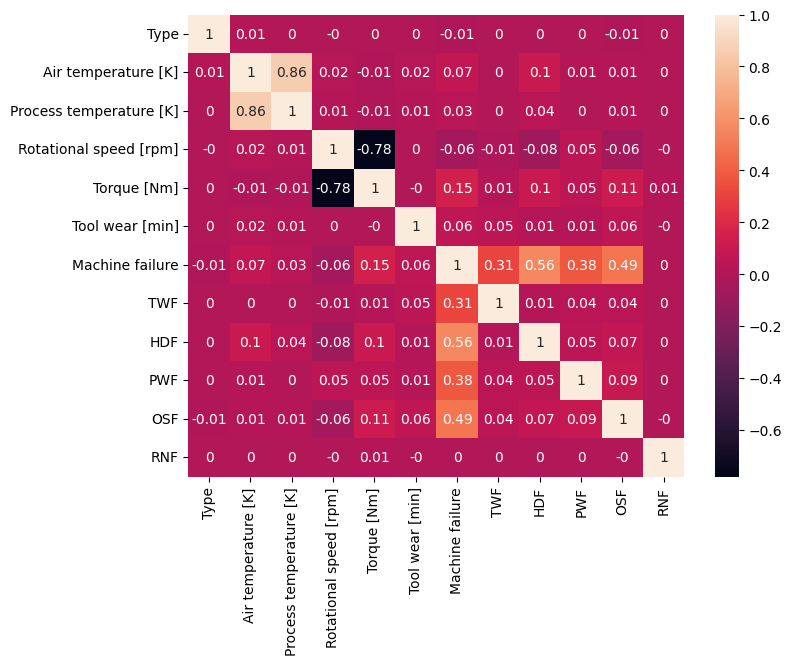

In [11]:
plt.figure(figsize = (8, 6))
sns.heatmap(round(data.drop(['Product ID', 'id'], axis = 1).corr(), 2),
            annot = True)

In [12]:
new_data = data.drop(['Product ID', 'id'], axis = 1)
new_test = test.drop(['Product ID', 'id'], axis = 1)
new_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [13]:
print(new_data.shape, new_test.shape)

(136429, 12) (90954, 11)


In [14]:
X = new_data.drop(['Machine failure'], axis = 1)
y = new_data['Machine failure']

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaler = scaler.fit_transform(X)
new_test_scaler = scaler.transform(new_test)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaler, y, random_state = 42, train_size = 0.85)

In [17]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(115964, 11) (20465, 11) (115964,) (20465,)


In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
svm_classifier = SVC(probability=True)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
lgb_classifier = LGBMClassifier(n_estimators=100, random_state=42)

In [22]:
ensemble_model = VotingClassifier(
    estimators=[
        ('svm', svm_classifier),
        ('random_forest', rf_classifier),
        ('gradient_boosting', gb_classifier),
        ('lightgbm', lgb_classifier)
    ],
    voting='soft'  # 'soft' for probability voting
)

In [23]:
ensemble_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1823, number of negative: 114141
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 115964, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015720 -> initscore=-4.136951
[LightGBM] [Info] Start training from score -4.136951


VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('gradient_boosting',
                              GradientBoostingClassifier(random_state=42)),
                             ('lightgbm', LGBMClassifier(random_state=42))],
                 voting='soft')

In [25]:
y_pred = ensemble_model.predict(X_val)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_val, y_pred)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.9962863425360371


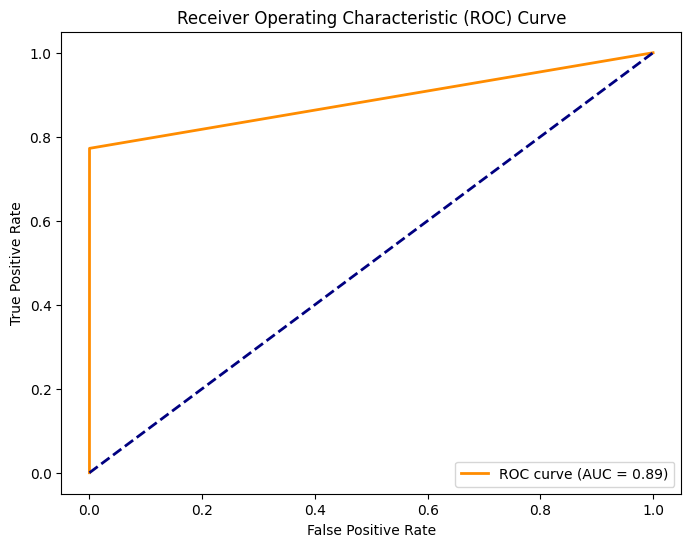

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 790.2 kB/s eta 0:00:00


In [32]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [33]:
clf1 = TabNetClassifier()

In [34]:
clf1.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

epoch 0  | loss: 0.07346 | val_0_auc: 0.80694 | val_1_auc: 0.82467 |  0:00:18s
epoch 1  | loss: 0.02988 | val_0_auc: 0.8848  | val_1_auc: 0.88375 |  0:00:32s
epoch 2  | loss: 0.02731 | val_0_auc: 0.91485 | val_1_auc: 0.92001 |  0:00:45s
epoch 3  | loss: 0.0262  | val_0_auc: 0.92824 | val_1_auc: 0.93411 |  0:00:54s
epoch 4  | loss: 0.02649 | val_0_auc: 0.94181 | val_1_auc: 0.94664 |  0:01:03s
epoch 5  | loss: 0.02601 | val_0_auc: 0.93646 | val_1_auc: 0.94193 |  0:01:11s
epoch 6  | loss: 0.02584 | val_0_auc: 0.92806 | val_1_auc: 0.94037 |  0:01:20s
epoch 7  | loss: 0.02516 | val_0_auc: 0.93309 | val_1_auc: 0.95163 |  0:01:28s
epoch 8  | loss: 0.02621 | val_0_auc: 0.93219 | val_1_auc: 0.94075 |  0:01:38s
epoch 9  | loss: 0.02762 | val_0_auc: 0.94507 | val_1_auc: 0.95365 |  0:01:45s
epoch 10 | loss: 0.02618 | val_0_auc: 0.94529 | val_1_auc: 0.94264 |  0:01:57s
epoch 11 | loss: 0.02689 | val_0_auc: 0.9458  | val_1_auc: 0.95137 |  0:02:05s
epoch 12 | loss: 0.0294  | val_0_auc: 0.94264 | val_

In [35]:
y_pred1 = clf1.predict(X_val)

In [37]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9962863425360371

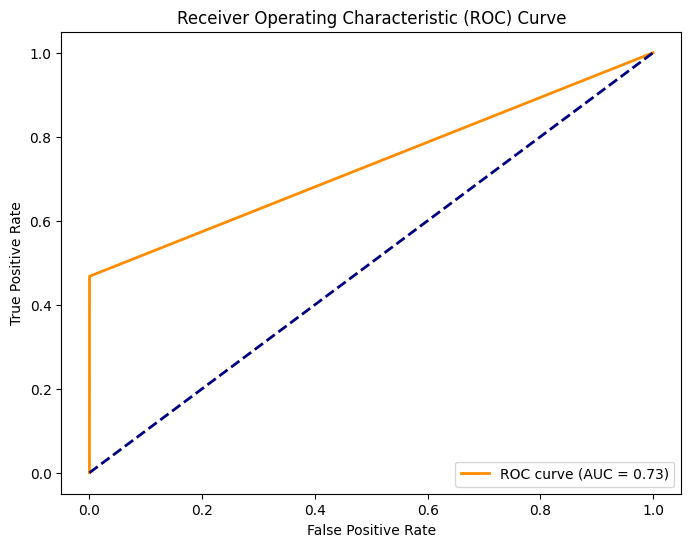

In [42]:
fpr, tpr, _ = roc_curve(y_val, y_pred1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
submission_preds = ensemble_model.predict(new_test_scaler)

In [40]:
submission_preds

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
test_ids = test["id"]
df = pd.DataFrame({'id': test_ids.values,
                  'Machine failure': submission_preds})

In [43]:
df.to_csv('submission.csv', index=False)